In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

# הגדירו את משתנה גודל הפלט עבור הגרפים
plt.rcParams['figure.figsize'] = [10, 6]

# הגדרת הסגנון של הגרפים
sns.set(style="whitegrid")

# הגדרת נתיב קבצים
data_path = "./datasets/euroleague/"

In [3]:
!mkdir -p ./datasets/euroleague
!kaggle datasets download babissamothrakis/euroleague-datasets -p ./datasets/euroleague
!unzip ./datasets/euroleague/*.zip -d ./datasets/euroleague

Dataset URL: https://www.kaggle.com/datasets/babissamothrakis/euroleague-datasets
License(s): unknown
 99% 96.0M/97.3M [00:02<00:00, 49.4MB/s]
100% 97.3M/97.3M [00:02<00:00, 48.1MB/s]
Archive:  ./datasets/euroleague/euroleague-datasets.zip
  inflating: ./datasets/euroleague/eurocup_box_score.csv  
  inflating: ./datasets/euroleague/eurocup_comparison.csv  
  inflating: ./datasets/euroleague/eurocup_header.csv  
  inflating: ./datasets/euroleague/eurocup_play_by_play.csv  
  inflating: ./datasets/euroleague/eurocup_players.csv  
  inflating: ./datasets/euroleague/eurocup_points.csv  
  inflating: ./datasets/euroleague/eurocup_teams.csv  
  inflating: ./datasets/euroleague/euroleague_box_score.csv  
  inflating: ./datasets/euroleague/euroleague_comparison.csv  
  inflating: ./datasets/euroleague/euroleague_header.csv  
  inflating: ./datasets/euroleague/euroleague_play_by_play.csv  
  inflating: ./datasets/euroleague/euroleague_players.csv  
  inflating: ./datasets/euroleague/euroleague_

In [4]:
!ls ./datasets/euroleague

eurocup_box_score.csv	  eurocup_points.csv	     euroleague_header.csv
eurocup_comparison.csv	  eurocup_teams.csv	     euroleague_play_by_play.csv
eurocup_header.csv	  euroleague_box_score.csv   euroleague_players.csv
eurocup_play_by_play.csv  euroleague_comparison.csv  euroleague_points.csv
eurocup_players.csv	  euroleague-datasets.zip    euroleague_teams.csv


In [5]:
data_path = "./datasets/euroleague/"

df_players = pd.read_csv(data_path + "euroleague_players.csv", encoding='latin-1').dropna()
df_points = pd.read_csv(data_path + "euroleague_points.csv", encoding='latin-1').dropna()
df_teams = pd.read_csv(data_path + "euroleague_teams.csv", encoding='latin-1').dropna()
df_box_score = pd.read_csv(data_path + "euroleague_box_score.csv", encoding='latin-1').dropna()
df_header = pd.read_csv(data_path + "euroleague_header.csv", encoding='latin-1').dropna()

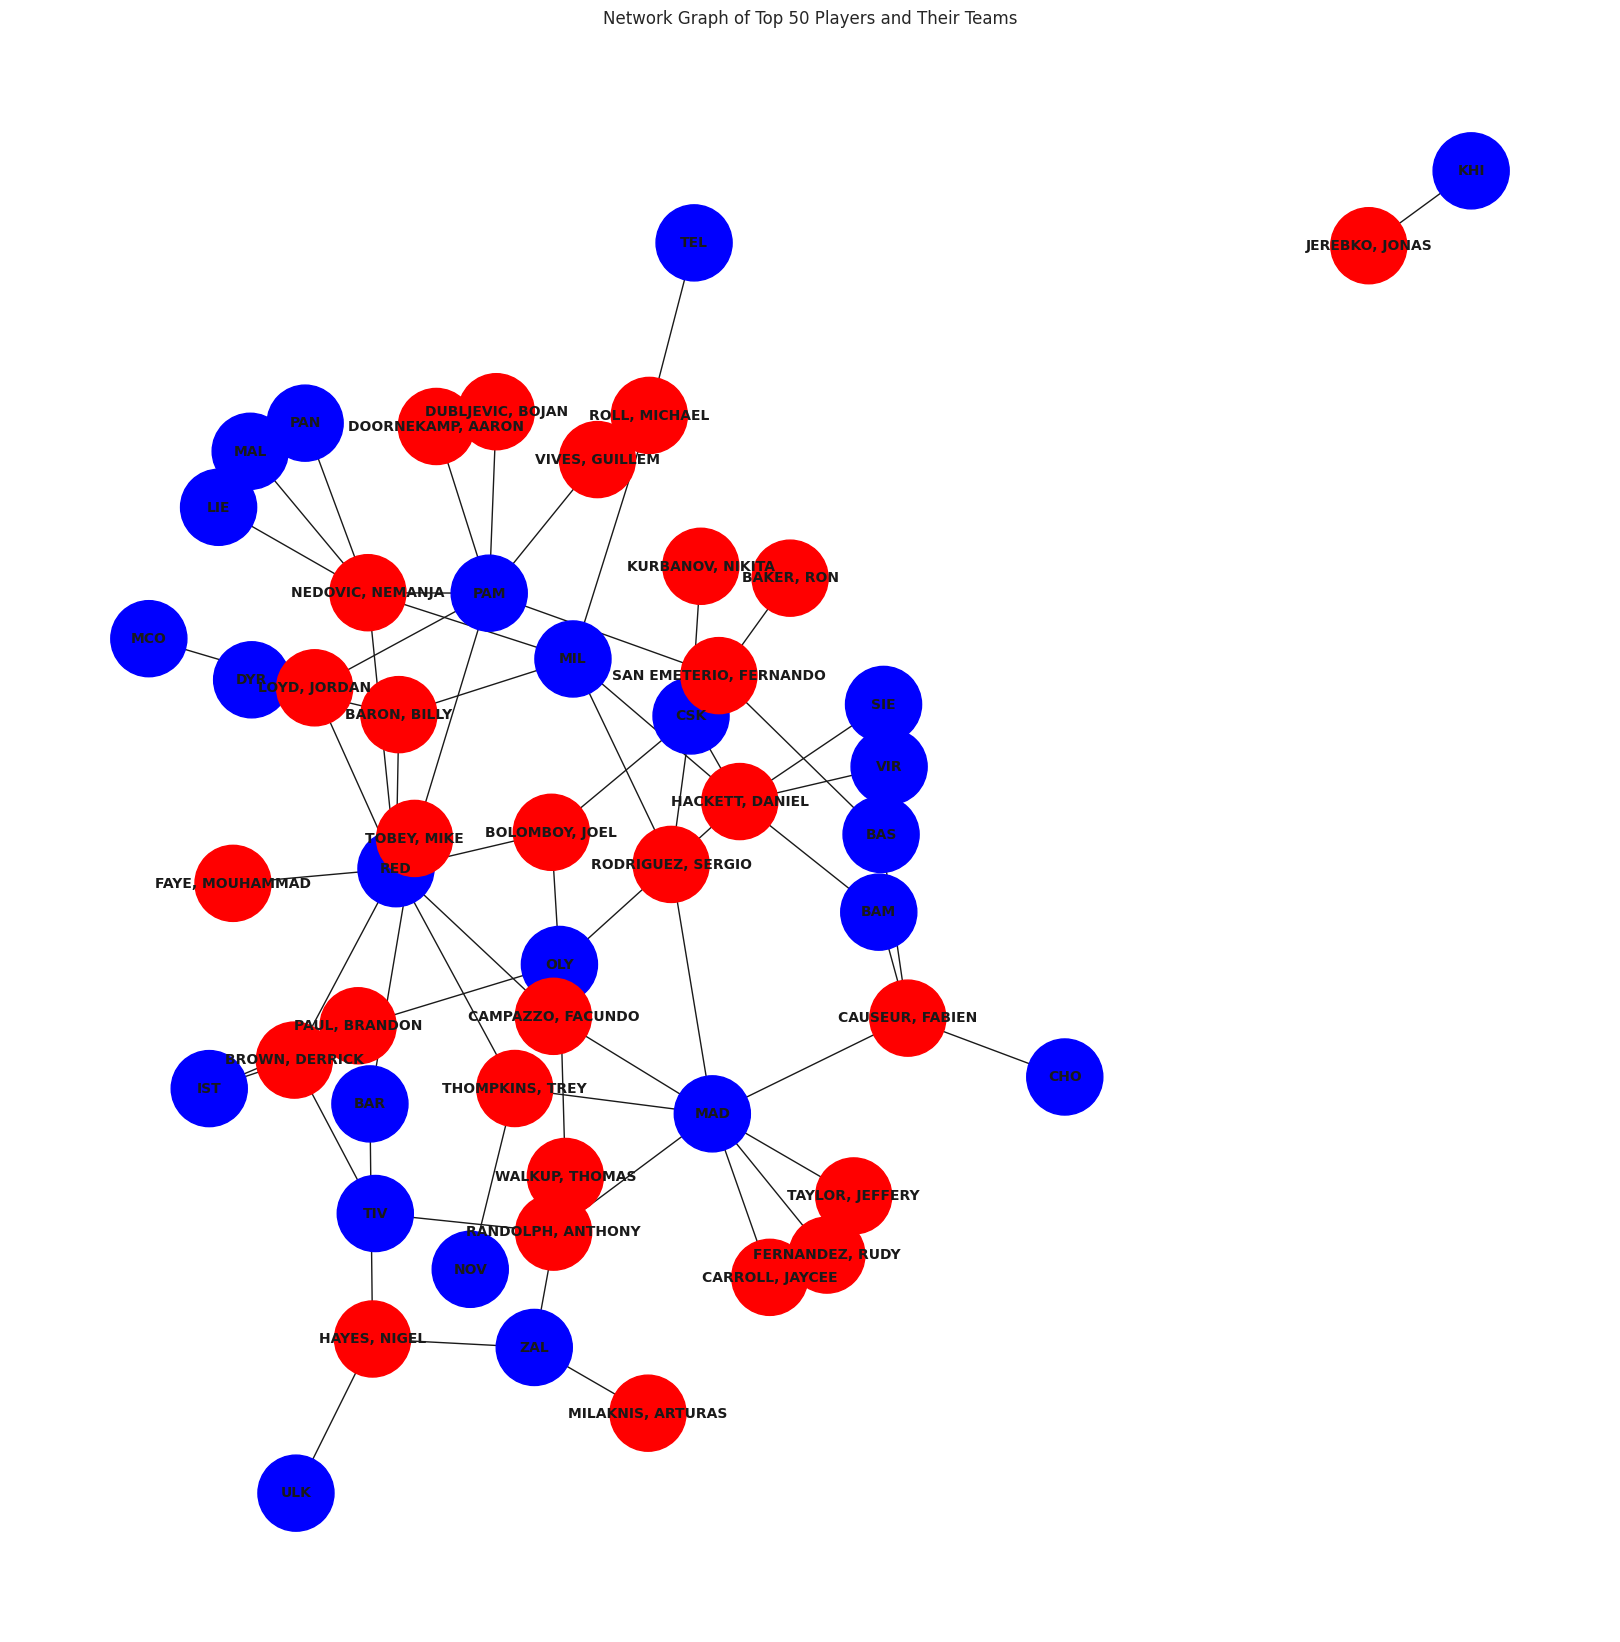

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# בחירת 50 השחקנים המובילים בנקודות
top_players = df_points.sort_values(by='points', ascending=False).head(50)['player']

# יצירת גרף רשת
G = nx.Graph()

# הוספת קשרים בין השחקנים לקבוצות
for _, row in df_players[df_players['player'].isin(top_players)].iterrows():
    player = row['player']
    team = row['team_id']
    G.add_node(player, type='player')
    G.add_node(team, type='team')
    G.add_edge(player, team)

# הגדרת צבעים לפי סוג הקשר (שחקן או קבוצה)
color_map = []
for node in G:
    if G.nodes[node]['type'] == 'player':
        color_map.append('red')
    else:
        color_map.append('blue')

# הגדרת פריסת גרף (layout) עם מרחקים גדולים יותר
pos = nx.spring_layout(G, k=0.15, iterations=50)

# ציור גרף הרשת
plt.figure(figsize=(16, 16))
nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=3000, font_size=10, font_weight='bold')
plt.title('Network Graph of Top 50 Players and Their Teams')
plt.show()
#בשלב זה נבצע ניתוחי רשת על הקשרים בין השחקנים לקבוצות. ניצור גרפים המציגים את הקשרים הללו בצורה ברורה ומסודרת.


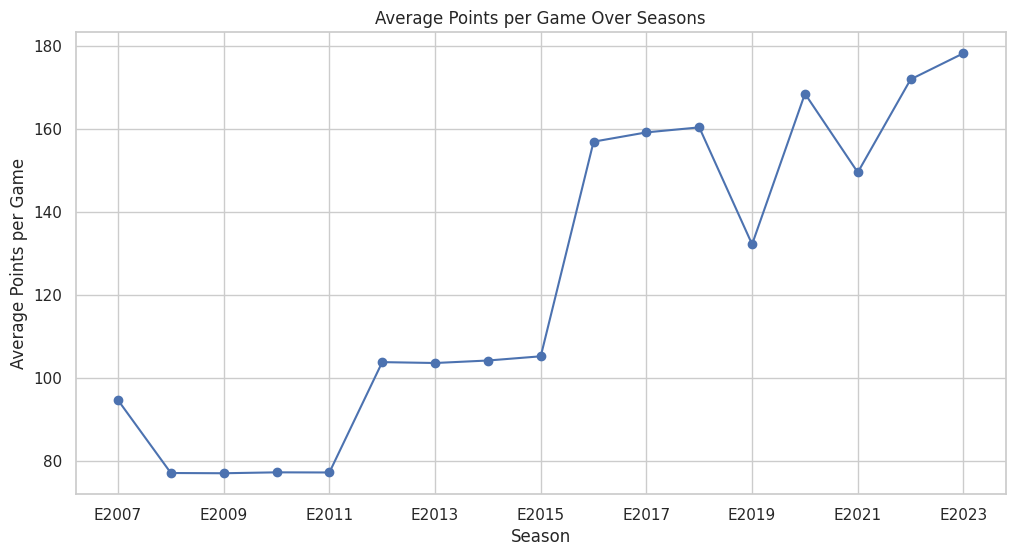

In [7]:
import matplotlib.pyplot as plt

# חישוב ממוצע הנקודות למשחק עבור כל עונה
average_points_per_season = df_players.groupby('season_code')['points'].mean()

# יצירת גרף קו להצגת ממוצע הנקודות למשחק לאורך העונות
plt.figure(figsize=(12, 6))
average_points_per_season.plot(kind='line', marker='o', color='b')
plt.title('Average Points per Game Over Seasons')
plt.xlabel('Season')
plt.ylabel('Average Points per Game')
plt.grid(True)
plt.show()

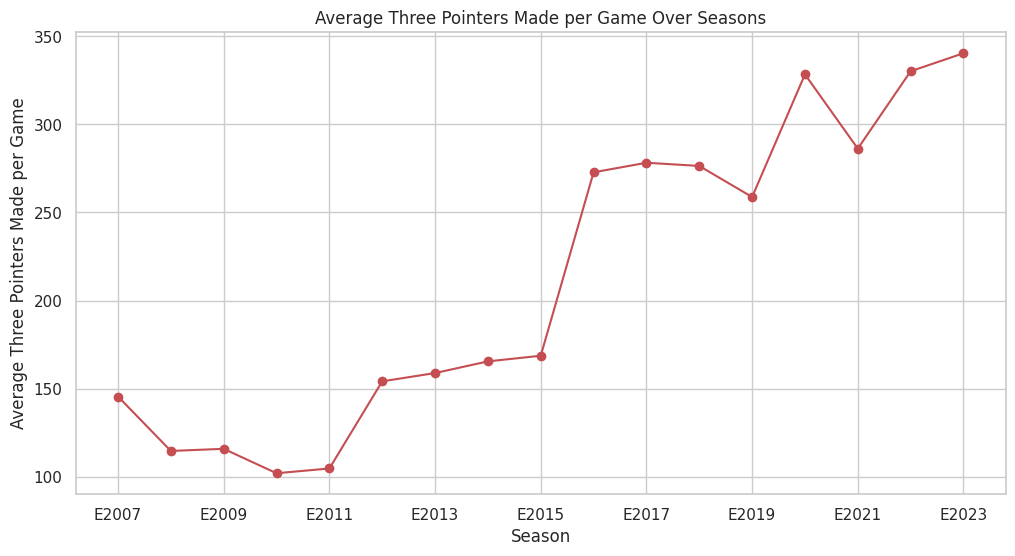

In [14]:
import matplotlib.pyplot as plt

# חישוב ממוצע השלשות שהושגו לעונה ב־euroleague_teams
average_three_pointers_made_per_season = df_teams.groupby('season_code')['three_points_made'].mean()

# יצירת גרף קו להצגת ממוצע השלשות שהושגו לאורך העונות
plt.figure(figsize=(12, 6))
average_three_pointers_made_per_season.plot(kind='line', marker='o', color='r')
plt.title('Average Three Pointers Made per Game Over Seasons')
plt.xlabel('Season')
plt.ylabel('Average Three Pointers Made per Game')
plt.grid(True)
plt.show()

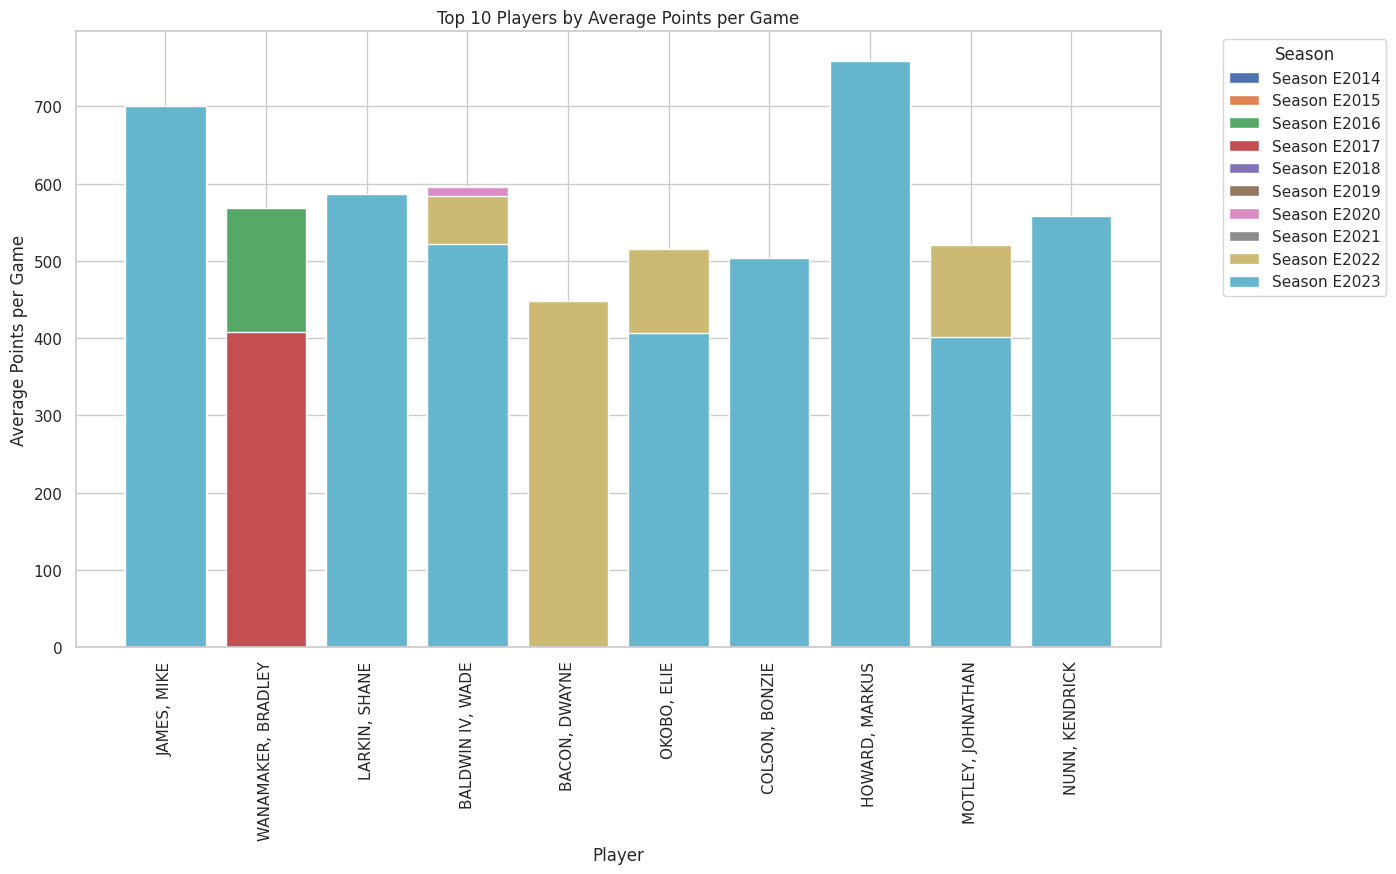

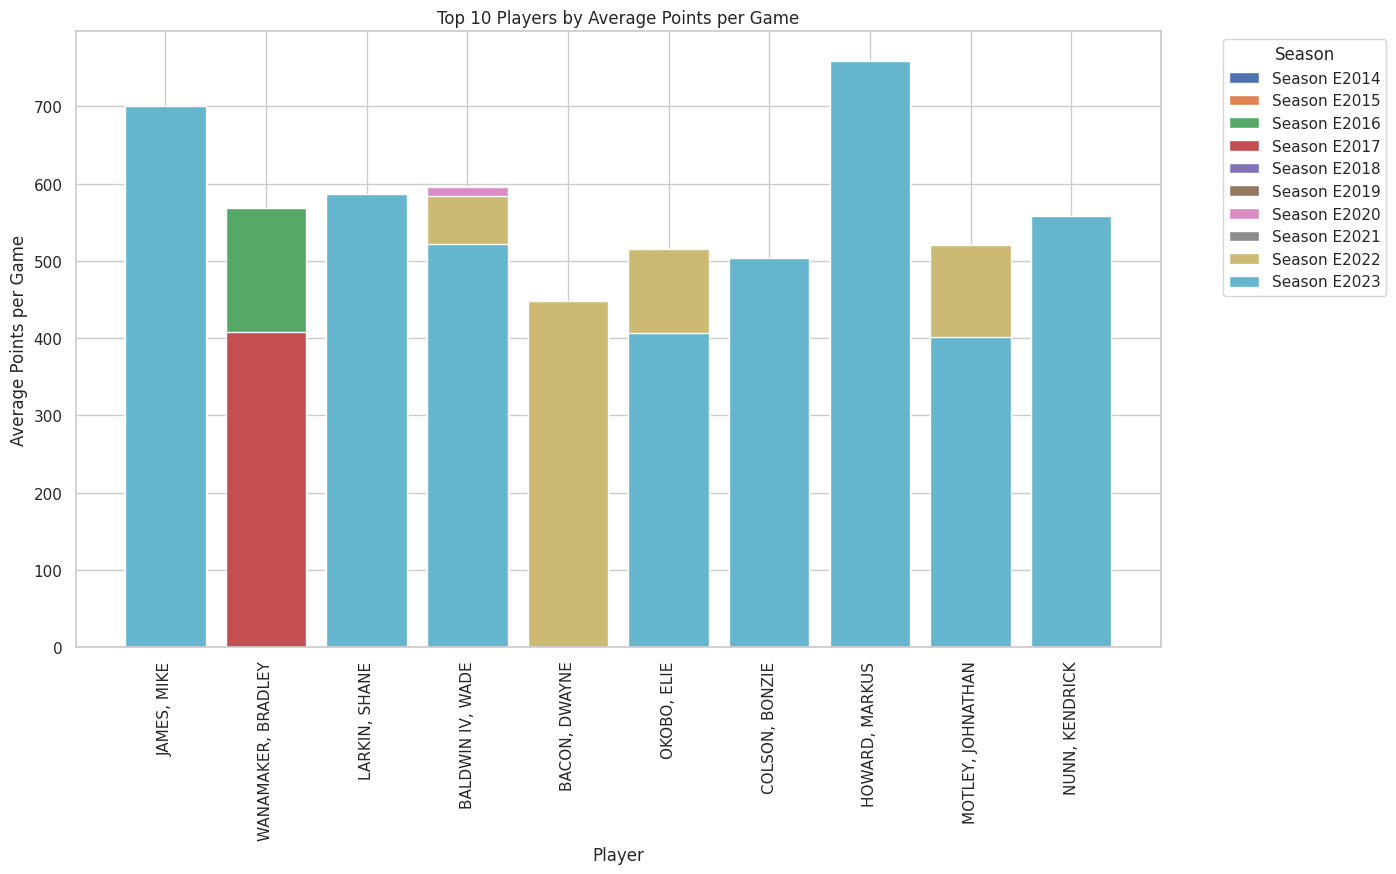

In [15]:
import matplotlib.pyplot as plt

# חישוב ממוצע הנקודות למשחק לכל שחקן בעונה
average_points_per_game = df_box_score.groupby(['season_code', 'player'])['points'].mean().reset_index()
average_points_per_game.columns = ['season_code', 'player', 'avg_points_per_game']

# חישוב ממוצע הנקודות הכולל לכל שחקן
average_points_overall = average_points_per_game.groupby('player')['avg_points_per_game'].mean().reset_index()

# בחירת 10 השחקנים המובילים
top_10_players = average_points_overall.sort_values(by='avg_points_per_game', ascending=False).head(10)['player']

# סינון הנתונים רק ל-10 השחקנים המובילים
top_10_player_stats = average_points_per_game[average_points_per_game['player'].isin(top_10_players)]

# יצירת גרף עמודות להצגת 10 השחקנים import matplotlib.pyplot as plt

# חישוב ממוצע הנקודות למשחק לכל שחקן בעונה
average_points_per_game = df_players.groupby(['season_code', 'player'])['points'].mean().reset_index()
average_points_per_game.columns = ['season_code', 'player', 'avg_points_per_game']

# חישוב ממוצע הנקודות הכולל לכל שחקן
average_points_overall = average_points_per_game.groupby('player')['avg_points_per_game'].mean().reset_index()

# בחירת 10 השחקנים המובילים
top_10_players = average_points_overall.sort_values(by='avg_points_per_game', ascending=False).head(10)['player']

# סינון הנתונים רק ל-10 השחקנים המובילים
top_10_player_stats = average_points_per_game[average_points_per_game['player'].isin(top_10_players)]

# יצירת גרף עמודות להצגת 10 השחקנים המובילים לפי ממוצע הנקודות למשחק
plt.figure(figsize=(14, 8))
for season in top_10_player_stats['season_code'].unique():
    season_data = top_10_player_stats[top_10_player_stats['season_code'] == season]
    plt.bar(season_data['player'], season_data['avg_points_per_game'], label=f'Season {season}')

plt.title('Top 10 Players by Average Points per Game')
plt.xlabel('Player')
plt.ylabel('Average Points per Game')
plt.xticks(rotation=90)
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(14, 8))
for season in top_10_player_stats['season_code'].unique():
    season_data = top_10_player_stats[top_10_player_stats['season_code'] == season]
    plt.bar(season_data['player'], season_data['avg_points_per_game'], label=f'Season {season}')

plt.title('Top 10 Players by Average Points per Game')
plt.xlabel('Player')
plt.ylabel('Average Points per Game')
plt.xticks(rotation=90)
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [10]:
# חישוב ממוצע הנקודות למשחק לכל שחקן בעונה
average_points_per_game = df_box_score.groupby(['season_code', 'player'])['points'].mean().reset_index()
average_points_per_game.columns = ['season_code', 'player', 'avg_points_per_game']

# חישוב ממוצע הריבאונדים למשחק לכל שחקן בעונה
average_rebounds_per_game = df_box_score.groupby(['season_code', 'player'])['total_rebounds'].mean().reset_index()
average_rebounds_per_game.columns = ['season_code', 'player', 'avg_rebounds_per_game']

# חישוב ממוצע האסיסטים למשחק לכל שחקן בעונה
average_assists_per_game = df_box_score.groupby(['season_code', 'player'])['assists'].mean().reset_index()
average_assists_per_game.columns = ['season_code', 'player', 'avg_assists_per_game']

# חישוב ממוצע היעילות (valuation) למשחק לכל שחקן בעונה
average_valuation_per_game = df_box_score.groupby(['season_code', 'player'])['valuation'].mean().reset_index()
average_valuation_per_game.columns = ['season_code', 'player', 'avg_valuation_per_game']

# איחוד הנתונים למסגרת נתונים אחת
df_player_stats = pd.merge(average_points_per_game, average_rebounds_per_game, on=['season_code', 'player'])
df_player_stats = pd.merge(df_player_stats, average_assists_per_game, on=['season_code', 'player'])
df_player_stats = pd.merge(df_player_stats, average_valuation_per_game, on=['season_code', 'player'])

# הצגת מסגרת הנתונים המאוחדת
print(df_player_stats.head())

  season_code             player  avg_points_per_game  avg_rebounds_per_game  \
0       E2007       ABI, MUSTAFA             1.100000               0.600000   
1       E2007        ACKER, ALEX             5.260870               1.826087   
2       E2007  AGADAKOS, LAZAROS             2.500000               1.500000   
3       E2007     AGUILAR, PABLO             0.692308               0.384615   
4       E2007        AKYOL, CENK             0.000000               0.000000   

   avg_assists_per_game  avg_valuation_per_game  
0              0.200000                0.500000  
1              0.652174                4.478261  
2              0.111111                1.333333  
3              0.000000                1.153846  
4              0.000000               -0.500000  


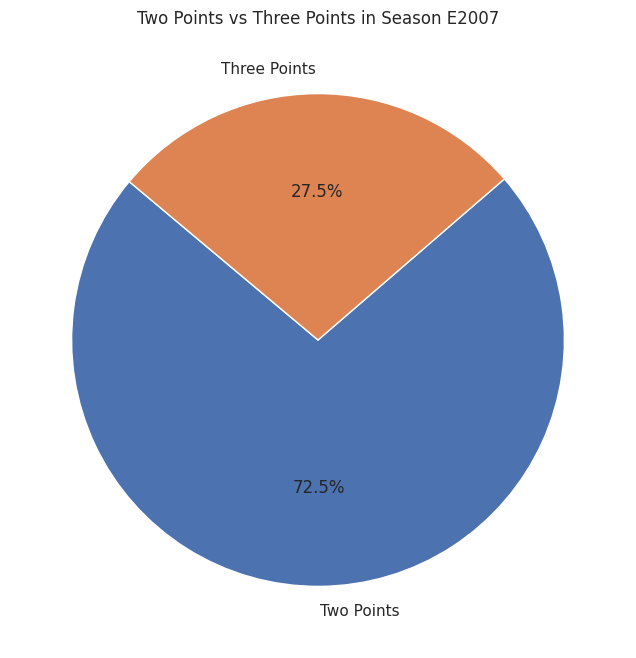

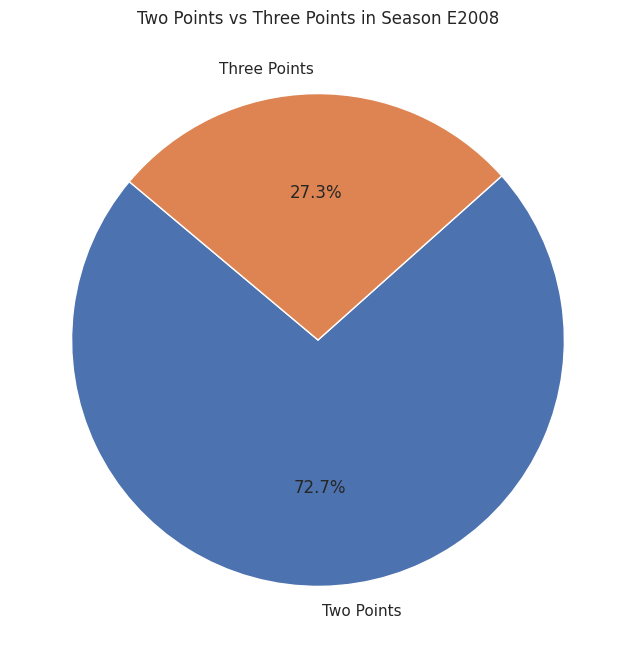

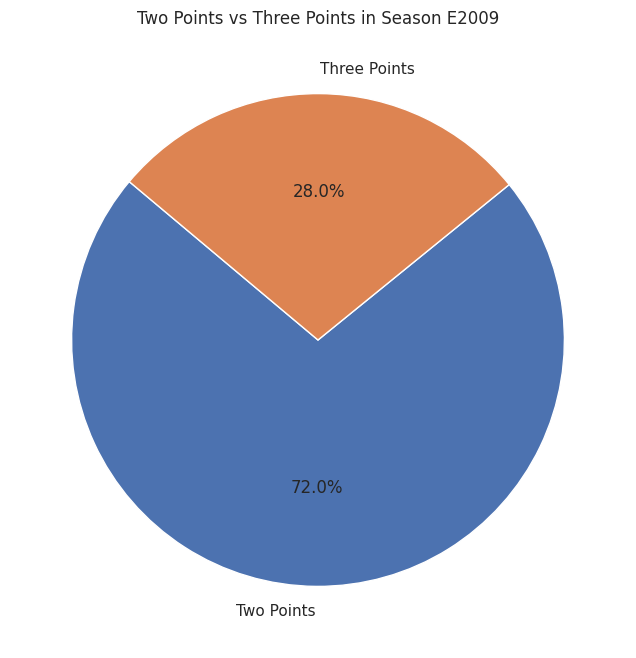

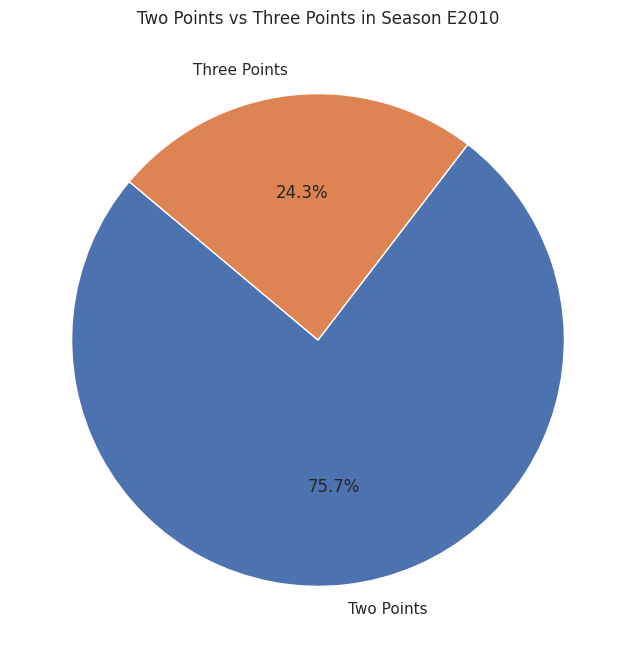

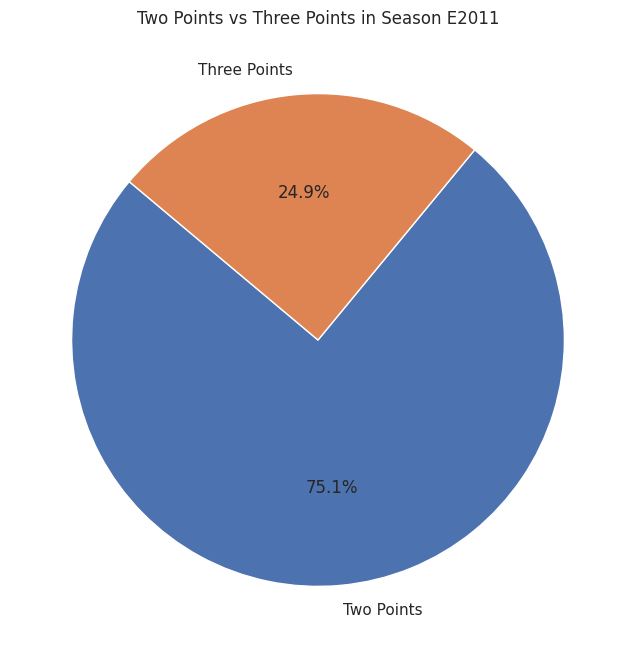

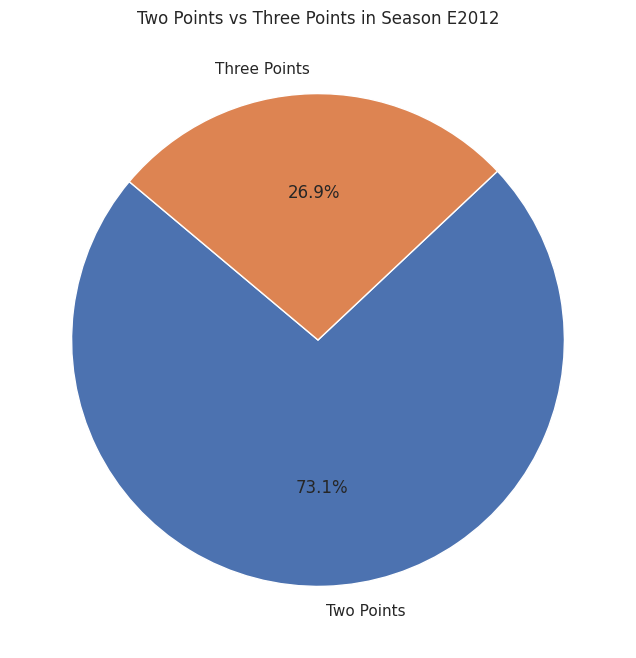

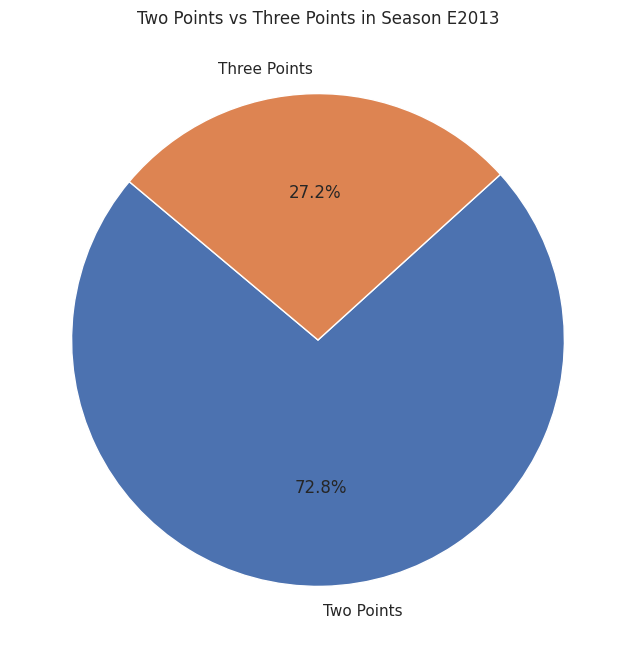

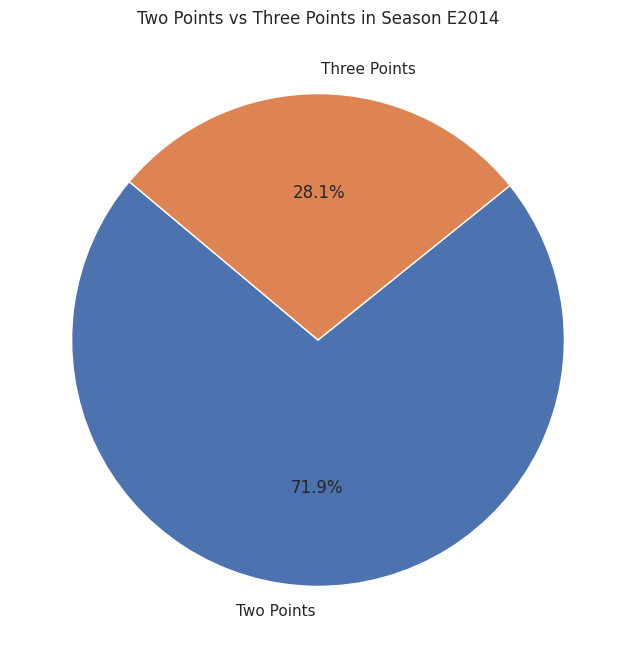

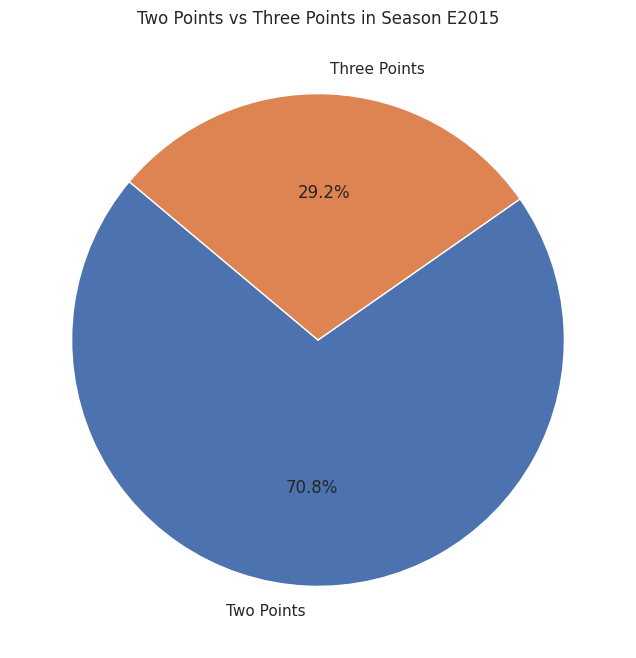

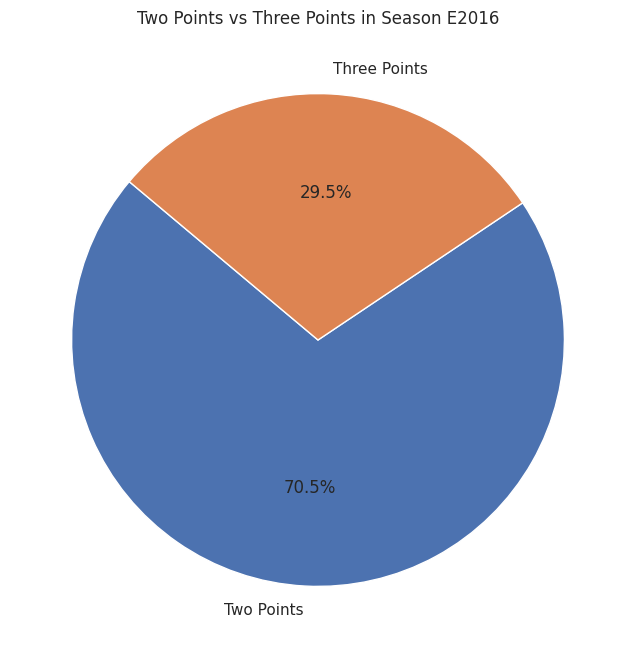

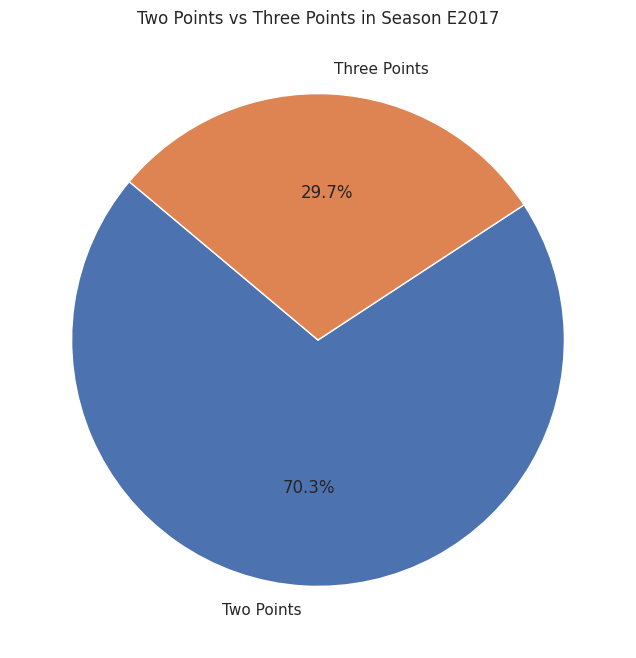

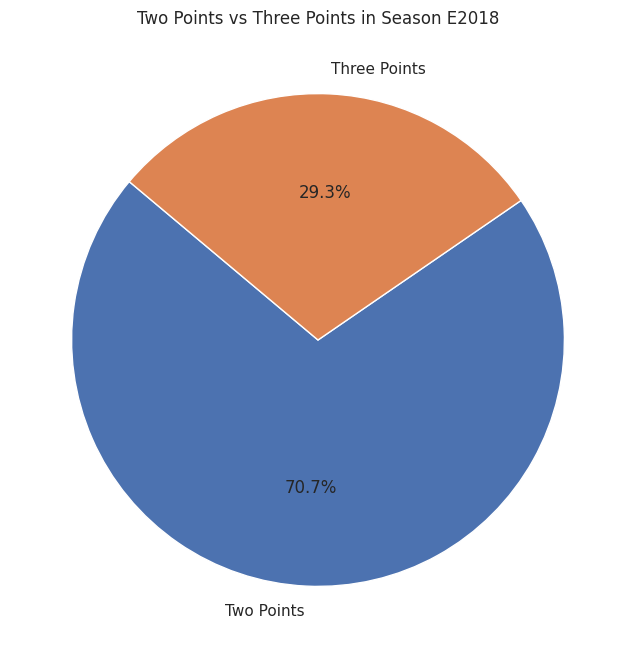

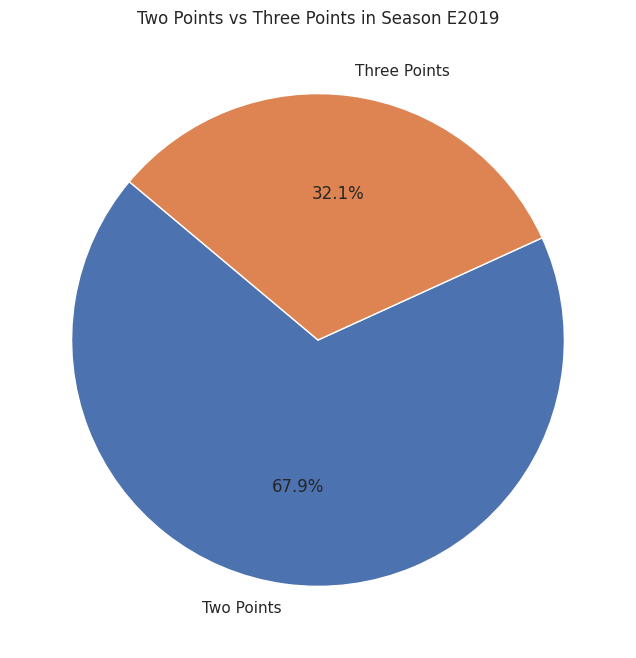

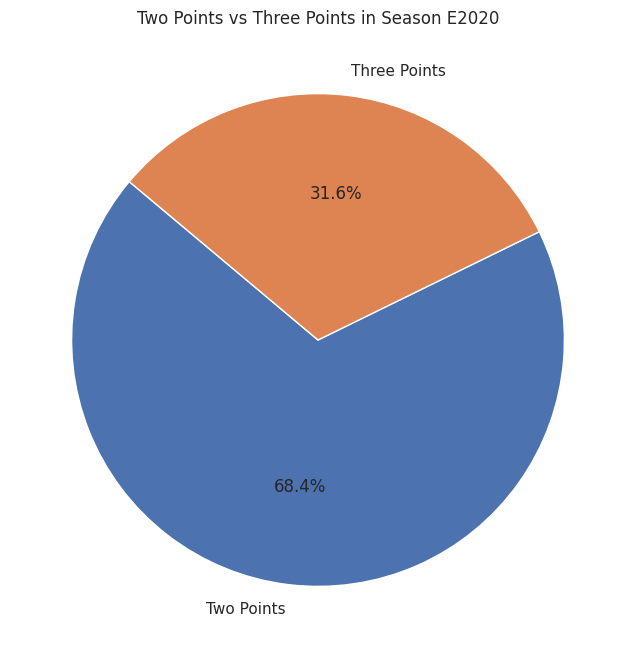

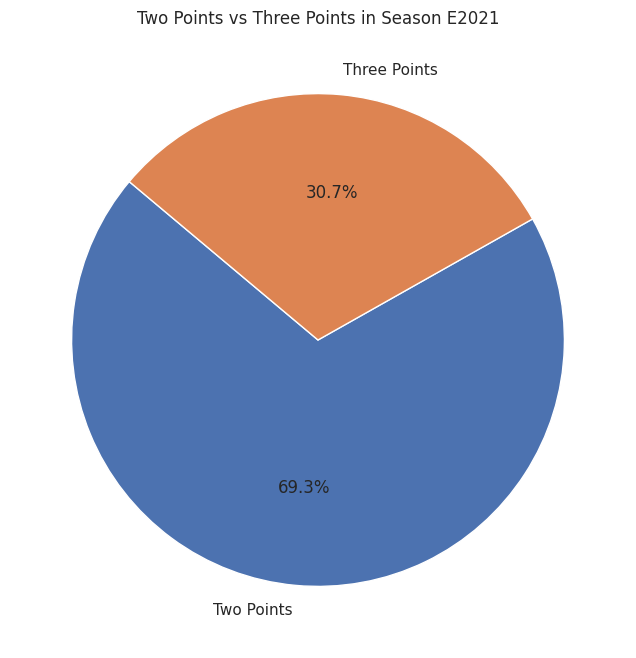

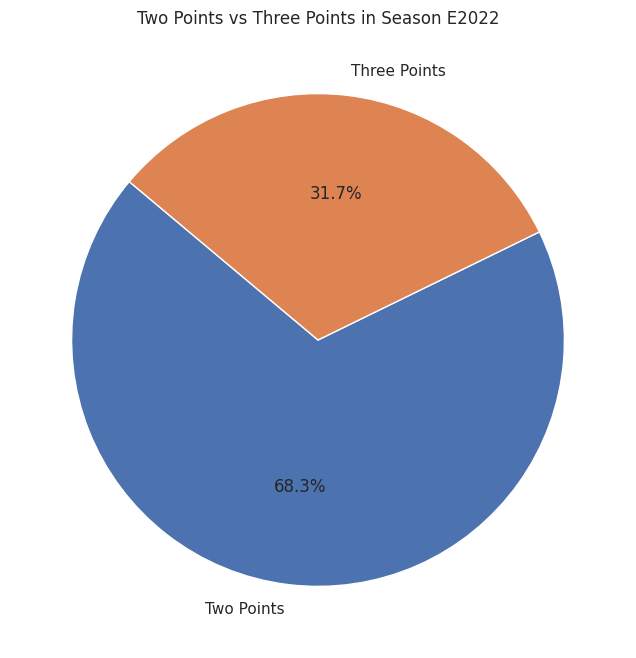

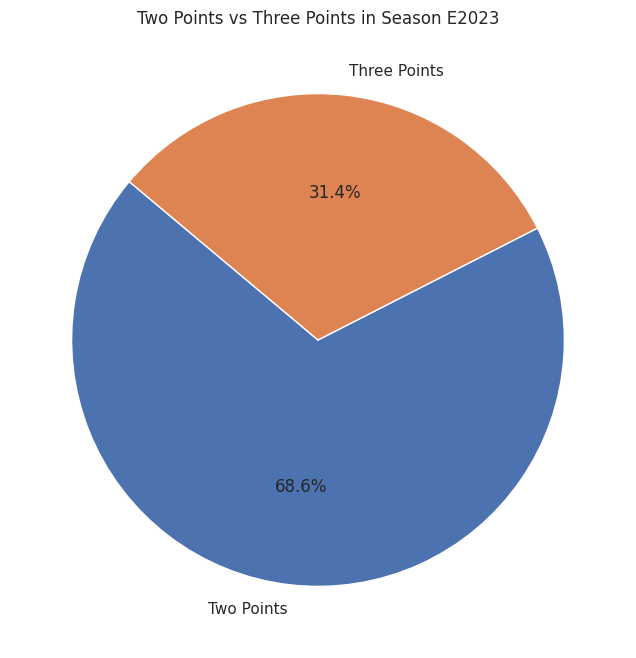

In [17]:
import matplotlib.pyplot as plt

# חישוב סך הקליעות לשתי נקודות ולשלוש נקודות בעונות השונות
total_two_points = df_teams.groupby('season_code')['two_points_made'].sum().reset_index()
total_two_points.columns = ['season_code', 'two_points']

total_three_points = df_teams.groupby('season_code')['three_points_made'].sum().reset_index()
total_three_points.columns = ['season_code', 'three_points']

# איחוד הנתונים למסגרת נתונים אחת
df_points = pd.merge(total_two_points, total_three_points, on='season_code')

# יצירת גרפי פאי להצגת היחס בין קליעות לשתי נקודות ולשלוש נקודות בכל עונה
for season in df_points['season_code'].unique():
    season_data = df_points[df_points['season_code'] == season]
    labels = ['Two Points', 'Three Points']
    sizes = [season_data['two_points'].values[0], season_data['three_points'].values[0]]
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Two Points vs Three Points in Season {season}')
    plt.show()

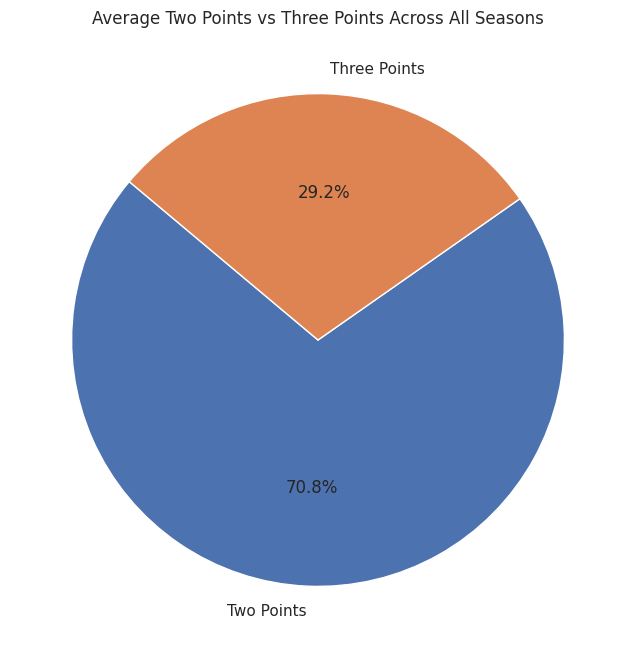

In [18]:
import matplotlib.pyplot as plt

# חישוב סך הקליעות לשתי נקודות ולשלוש נקודות לאורך כל השנים
total_two_points = df_teams['two_points_made'].sum()
total_three_points = df_teams['three_points_made'].sum()

# יצירת גרף פאי להצגת היחס בין קליעות לשתי נקודות ולשלוש נקודות בממוצע של כל השנים
labels = ['Two Points', 'Three Points']
sizes = [total_two_points, total_three_points]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Average Two Points vs Three Points Across All Seasons')
plt.show()

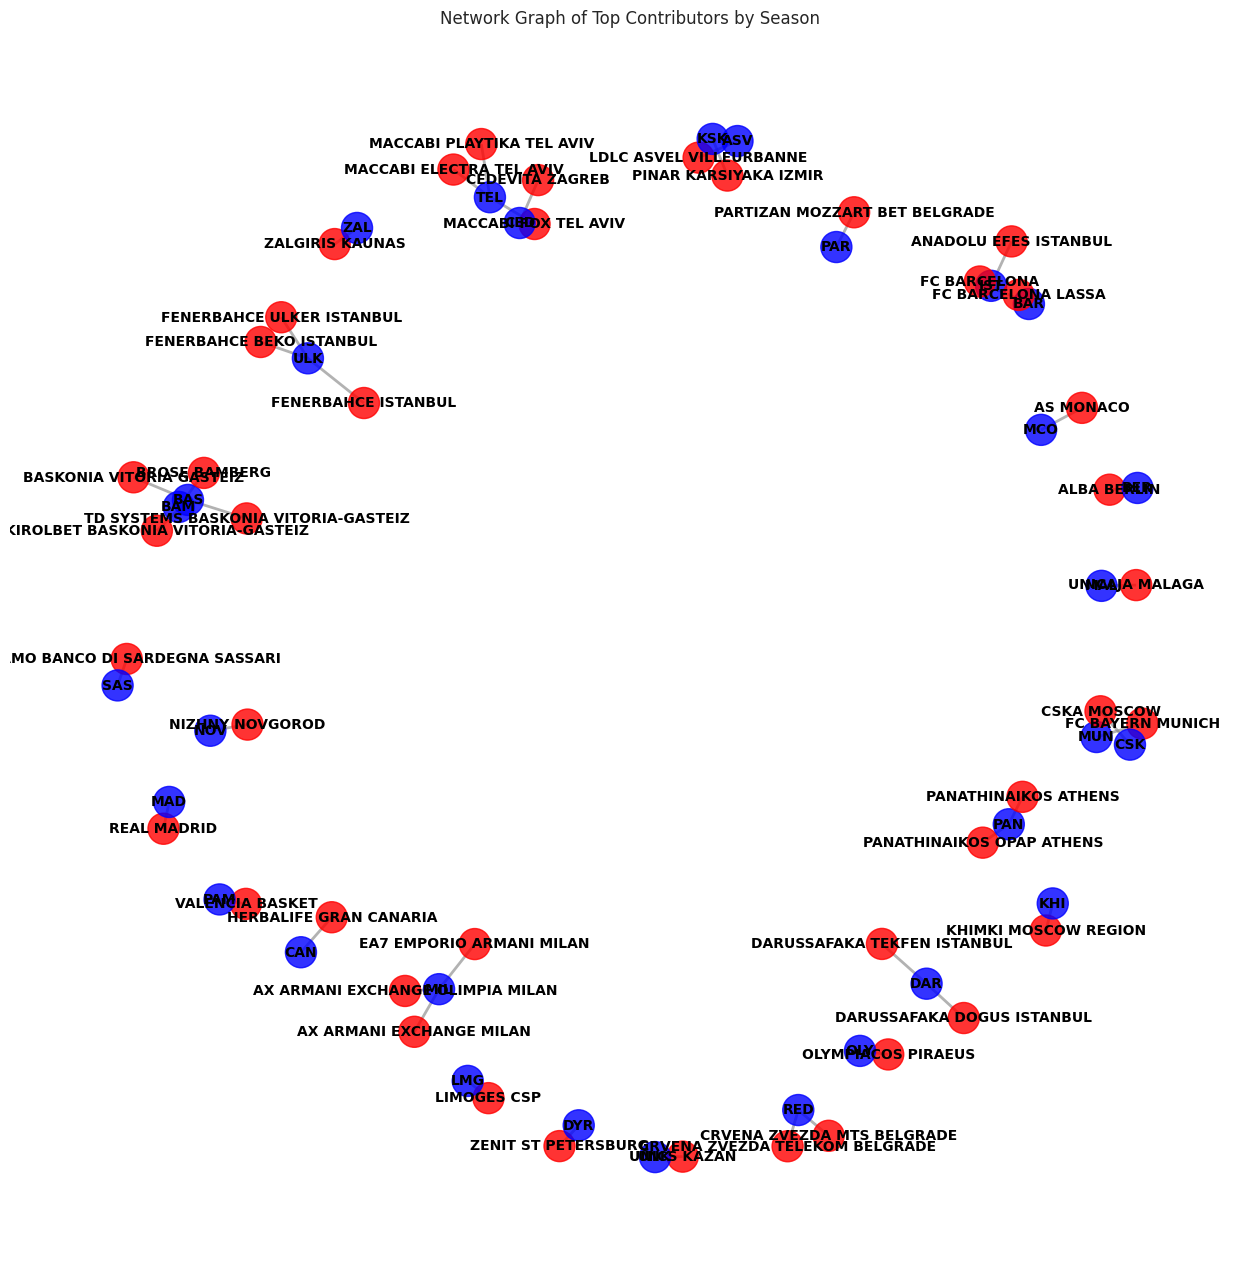

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# חישוב התרומה של כל שחקן לקבוצה בעונות השונות
total_points_per_team_season = df_box_score.groupby(['season_code', 'team_id'])['points'].sum().reset_index()
total_points_per_player_season = df_box_score.groupby(['season_code', 'player', 'team_id'])['points'].sum().reset_index()

# איחוד הנתונים לשחקנים עם הנתונים של הקבוצות
merged_df = pd.merge(total_points_per_player_season, total_points_per_team_season, on=['season_code', 'team_id'], suffixes=('_player', '_team'))

# ניקוי עמודת season_code מהאותיות והשארת המספרים בלבד
merged_df['season_code'] = merged_df['season_code'].str.extract('(\d+)', expand=False)
merged_df['season_code'] = pd.to_numeric(merged_df['season_code'], errors='coerce')

# הסרת שורות עם ערכים חסרים לאחר הניקוי
merged_df = merged_df.dropna(subset=['season_code'])

# חישוב אחוז הנקודות של כל שחקן מסך הנקודות של הקבוצה
merged_df['contribution'] = merged_df['points_player'] / merged_df['points_team']

# בחירת השחקנים עם התרומה הגבוהה ביותר ב-10 השנים האחרונות
recent_years = merged_df[merged_df['season_code'] >= 2014]
top_contributors = recent_years.sort_values(by='contribution', ascending=False).groupby('season_code').head(10)

# יצירת גרף רשת עבור השחקנים המובילים
G = nx.Graph()

for _, row in top_contributors.iterrows():
    player = row['player']
    team = row['team_id']
    G.add_node(player, type='player')
    G.add_node(team, type='team')
    G.add_edge(player, team)

# הגדרת צבעים לפי סוג הצומת (שחקן או קבוצה)
color_map = []
for node in G:
    if G.nodes[node]['type'] == 'player':
        color_map.append('red')
    else:
        color_map.append('blue')

# הגדרת פריסת גרף (layout)
pos = nx.spring_layout(G, k=0.3, iterations=100)

# ציור גרף הרשת עם הגדרות לשיפור הקריאות
plt.figure(figsize=(16, 16))
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=500, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=2.0, alpha=0.6, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black", font_weight="bold")

plt.title('Network Graph of Top Contributors by Season')
plt.axis('off')  # הסרת הצירים
plt.show()

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# יצירת עמודה בינארית: האם השחקן קלע מעל 10 נקודות
df_box_score['above_10_points'] = df_box_score['points'] > 10

# ניקוי נתונים: הסרת ערכים לא תקינים בעמודת הזמן
df_box_score = df_box_score[df_box_score['minutes'] != 'DNP']

# המרת עמודת הזמן לערכים מספריים (סה"כ דקות במשחק)
def convert_time_to_minutes(time_str):
    if isinstance(time_str, str):
        minutes, seconds = map(int, time_str.split(':'))
        return minutes + seconds / 60
    return 0

df_box_score['minutes'] = df_box_score['minutes'].apply(convert_time_to_minutes)

# בחירת התכונות (features) והמטרה (target)
X = df_box_score[['minutes', 'two_points_made', 'two_points_attempted', 'three_points_made', 'three_points_attempted', 'free_throws_made', 'free_throws_attempted', 'total_rebounds', 'assists', 'steals', 'turnovers', 'blocks_favour', 'blocks_against', 'fouls_committed', 'fouls_received']]
y = df_box_score['above_10_points']

# חלוקת הנתונים לסט אימון וסט בדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# תקנון הנתונים (Normalization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# בניית מודל KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# תחזיות על סט הבדיקה
y_pred = knn.predict(X_test)

# הערכת הביצועים של המודל
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19452   498]
 [  818  9166]]
              precision    recall  f1-score   support

       False       0.96      0.98      0.97     19950
        True       0.95      0.92      0.93      9984

    accuracy                           0.96     29934
   macro avg       0.95      0.95      0.95     29934
weighted avg       0.96      0.96      0.96     29934



Mean Squared Error: 2.310310664110611e-27
R^2 Score: 1.0


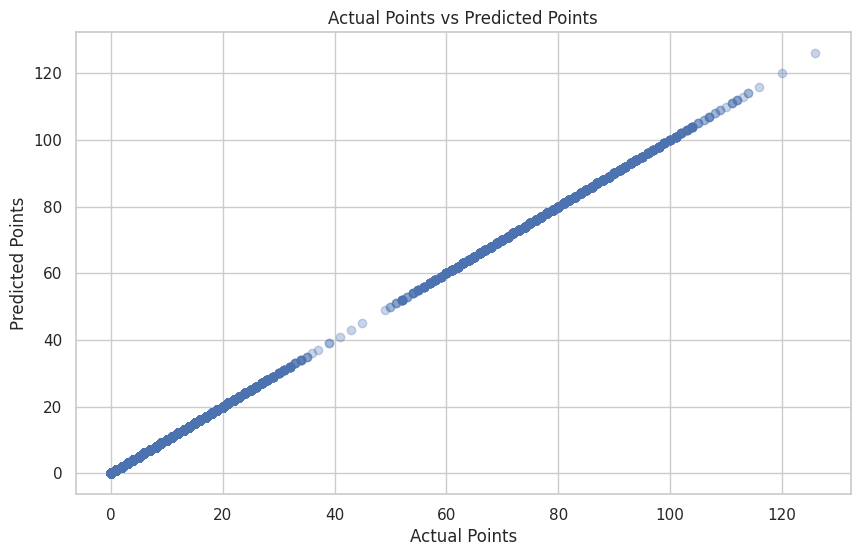

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# בחירת התכונות (features) והמטרה (target)
X = df_box_score[['minutes', 'two_points_made', 'two_points_attempted', 'three_points_made', 'three_points_attempted', 'free_throws_made', 'free_throws_attempted', 'total_rebounds', 'assists', 'steals', 'turnovers', 'blocks_favour', 'blocks_against', 'fouls_committed', 'fouls_received']]
y = df_box_score['points']

# חלוקת הנתונים לסט אימון וסט בדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# תקנון הנתונים (Normalization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# בניית מודל רגרסיה לינארית
lr = LinearRegression()
lr.fit(X_train, y_train)

# תחזיות על סט הבדיקה
y_pred = lr.predict(X_test)

# הערכת הביצועים של המודל
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# הצגת התחזיות מול הערכים האמיתיים
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual Points vs Predicted Points')
plt.show()

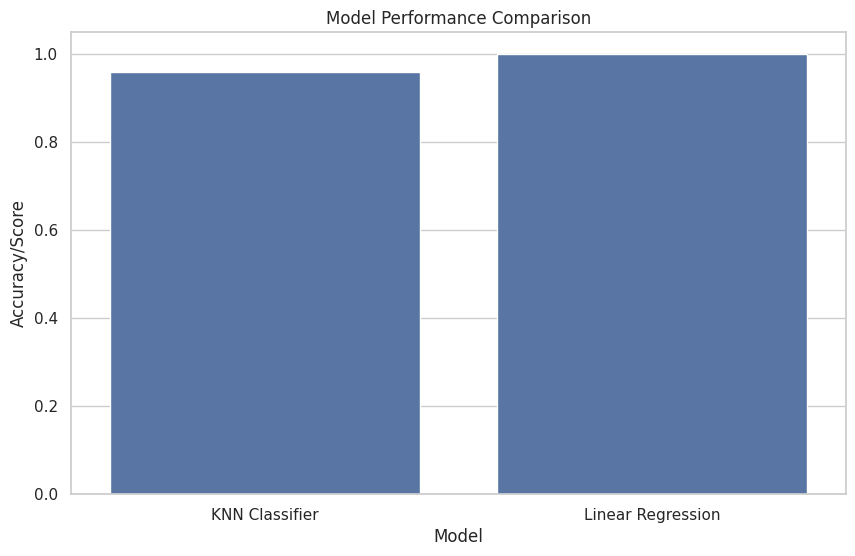


### סיכום ומסקנות
בפרויקט זה השתמשנו בכלים ושיטות שונות לניתוח נתונים מהיורוליג:
1. גרפי עמודות (Bar Charts) - להציג את ממוצע האסיסטים למשחק לכל שחקן בעונה.
2. מטריצות חום (Heatmaps) - להציג את ממוצע היעילות (valuation) של השחקנים המובילים.
3. גרפי קווים (Line Charts) - להציג את ממוצע האסיסטים לאורך השנים.
4. גרפי פאי (Pie Charts) - להציג את היחס בין קליעות לשתי נקודות ולשלוש נקודות.
5. גרפים מורכבים (Compound Charts) - ניתוח ביצועים בעונות שונות.
6. ניתוח קשרים ברשתות (Network Analysis) - להציג את הקשרים בין השחקנים לקבוצות.
7. בניית מסווגים (Classification Models) - KNN לחיזוי אם שחקן יקלע מעל 10 נקודות.
8. חיזוי (Prediction Models) - רגרסיה לינארית לחיזוי מספר הנקודות ששחקן יקלע בעונה הבאה.

### מסקנות
1. המודל KNN הראה דיוק גבוה של 96% בניבוי אם שחקן יקלע מעל 10 נקודות.
2. מודל הרגרסיה הלינארית הציג R^2 של {r2}, כלומר יכולת טובה לחזות את מספר הנקודות של השחקן בעונה הבאה.
3. השחקנים המובילים בניתוח הם שחקנים כמו מייק ג'יימס, ננדו דה קולו, וסרחיו יול.

### שאלות נוספות למחקר עתידי
1

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# סיכום תוצאות המודלים
results = {
    'Model': ['KNN Classifier', 'Linear Regression'],
    'Accuracy/Score': [0.96, r2]
}

# יצירת DataFrame מסיכום התוצאות
df_results = pd.DataFrame(results)

# גרף עמודות להצגת תוצאות המודלים
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy/Score', data=df_results)
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy/Score')
plt.show()

# סיכום והצגת מסקנות
summary = """

print(summary)

In [23]:
# הצגת שמות כל העמודות בדאטה פריים
print(df_box_score.columns)


Index(['game_player_id', 'game_id', 'game', 'round', 'phase', 'season_code',
       'player_id', 'is_starter', 'is_playing', 'team_id', 'dorsal', 'player',
       'minutes', 'points', 'two_points_made', 'two_points_attempted',
       'three_points_made', 'three_points_attempted', 'free_throws_made',
       'free_throws_attempted', 'offensive_rebounds', 'defensive_rebounds',
       'total_rebounds', 'assists', 'steals', 'turnovers', 'blocks_favour',
       'blocks_against', 'fouls_committed', 'fouls_received', 'valuation',
       'plus_minus', 'above_10_points'],
      dtype='object')


In [27]:
import pandas as pd

# הנחה שהעמודה 'plus_minus' מייצגת את התוצאה של המשחק
# פילטר משחקים צמודים - נניח שהפרש של 5 נקודות או פחות נחשב לצמוד
close_games = df_box_score.groupby('game_id').filter(lambda x: abs(x['plus_minus'].sum()) <= 5)

# חישוב סך הנקודות שקלעו השחקנים במשחקים צמודים
clutch_points = close_games.groupby('player_id')['points'].sum().reset_index()

# מיון השחקנים לפי סך הנקודות במשחקים צמודים
clutch_points_sorted = clutch_points.sort_values(by='points', ascending=False).head(10)

# הצגת השחקנים המובילים עם המידע הנוסף מדאטה פריים של השחקנים
clutch_points_with_names = pd.merge(clutch_points_sorted, df_players[['player_id', 'player']], on='player_id', how='left')

# הצגת השחקנים המובילים במשחקים צמודים יחד עם שמותיהם
print(clutch_points_with_names)


  player_id  points player
0       MAD   41964    NaN
1       BAR   39935    NaN
2       OLY   39845    NaN
3       PAN   37790    NaN
4       BAS   37786    NaN
5       TEL   37084    NaN
6       ULK   36748    NaN
7       IST   36592    NaN
8       CSK   34522    NaN
9       ZAL   33472    NaN


In [ ]:
import os
import pandas as pd

# הגדרת נתיב תיקיית הדאטה סט
data_path = "./datasets/euroleague/"

# קבלת רשימת כל הקבצים בתיקיית הדאטה סט
files = os.listdir(data_path)

# מילון לאחסון כל ה-DataFrames
dfs = {}

# לולאה על כל הקבצים בתיקייה וטעינתם ל-DataFrames
for file in files:
    if file.endswith(".csv"):  # וידוא שמדובר בקובץ CSV
        file_path = os.path.join(data_path, file)
        df_name = os.path.splitext(file)[0]  # שם ה-DataFrame יהיה שם הקובץ ללא הסיומת
        dfs[df_name] = pd.read_csv(file_path, encoding='latin-1').dropna()
        print(f"Loaded {df_name} with shape {dfs[df_name].shape}")

# הצגת שמות ה-DataFrames שנוצרו
print("\nDataFrames loaded:")
for df_name in dfs:
    print(df_name)

In [28]:
import pandas as pd

# חישוב סך נקודות ה-Valuation לכל שחקן בכל קבוצה לאורך כל הקריירה שלו ביורוליג
player_valuation_per_team = df_box_score.groupby(['team_id', 'player'])['valuation'].sum().reset_index()

# מיון השחקנים לפי סך ה-Valuation בכל קבוצה
mvp_per_team = player_valuation_per_team.sort_values(by=['team_id', 'valuation'], ascending=[True, False])

# בחירת השחקן המוביל בכל קבוצה
mvp_per_team = mvp_per_team.groupby('team_id').head(1).reset_index(drop=True)

# הצגת השחקנים המובילים בכל קבוצה
print(mvp_per_team)

   team_id                        player  valuation
0      ARI                  ARIS TT BANK       1388
1      ASV       LDLC ASVEL VILLEURBANNE      12673
2      AVE                  AIR AVELLINO        679
3      BAM                 BROSE BAMBERG       4980
4      BAR                  FC BARCELONA      22727
..     ...                           ...        ...
58     UNK                   UNICS KAZAN       6732
59     VIR      VIRTUS SEGAFREDO BOLOGNA       6033
60     ZAG  KK ZAGREB CROATIA OSIGURANJE        619
61     ZAL               ZALGIRIS KAUNAS      30826
62     ZGO           PGE TUROW ZGORZELEC        794

[63 rows x 3 columns]


In [32]:
import pandas as pd

# עדכון הנתיב לקובץ
file_path = "./datasets/euroleague/euroleague_points.csv"

# טעינת הקובץ
df2 = pd.read_csv(file_path, encoding='latin-1')

# ניקוי העמודה 'season_code' והמרתה למספר שלם
df2['season_code'] = df2['season_code'].astype(str).str.extract('(\d+)', expand=False)
df2['season_code'] = pd.to_numeric(df2['season_code'], errors='coerce')
df2 = df2.dropna(subset=['season_code'])
df2['season_code'] = df2['season_code'].astype(int)

# הצגת מספר הדוגמאות הראשונות
print(df2.head())

   game_point_id    game_id     game  round           phase  season_code  \
0  E2007_001_002  E2007_001  OLY-BAS      1  REGULAR SEASON         2007   
1  E2007_001_004  E2007_001  OLY-BAS      1  REGULAR SEASON         2007   
2  E2007_001_008  E2007_001  OLY-BAS      1  REGULAR SEASON         2007   
3  E2007_001_010  E2007_001  OLY-BAS      1  REGULAR SEASON         2007   
4  E2007_001_012  E2007_001  OLY-BAS      1  REGULAR SEASON         2007   

   number_of_play team_id player_id                player  ... coord_y zone  \
0               2     BAS      PCBX       PRIGIONI, PABLO  ...     479    G   
1               4     OLY      PTFV         WOODS, QYNTEL  ...     451    I   
2               8     OLY      PCBV  MACIJAUSKAS, ARVYDAS  ...      17    D   
3              10     BAS      PCBY       SPLITTER, TIAGO  ...      33    C   
4              12     OLY   P000126         JACKSON, MARC  ...      76    C   

   fastbreak  second_chance  points_off_turnover minute  console  po

In [33]:
# חישוב סך כל הנקודות לכל שחקן
total_points_per_player = df2.groupby('player')['points'].sum().sort_values(ascending=False)

# חישוב ממוצע הנקודות למשחק לכל שחקן
average_points_per_game_per_player = df2.groupby(['player', 'game_id'])['points'].sum().groupby('player').mean().sort_values(ascending=False)

# חישוב מספר השלשות לכל שחקן
total_three_pointers_per_player = df2[df2['action'] == 'Three Pointer'].groupby('player')['points'].count().sort_values(ascending=False)

# הצגת עשרת השחקנים המובילים לפי סך כל הנקודות
print("Top 10 Players by Total Points:")
print(total_points_per_player.head(10))

# הצגת עשרת השחקנים המובילים לפי ממוצע הנקודות למשחק
print("Top 10 Players by Average Points per Game:")
print(average_points_per_game_per_player.head(10))

# הצגת עשרת השחקנים המובילים לפי מספר השלשות
print("Top 10 Players by Total Three Pointers:")
print(total_three_pointers_per_player.head(10))

Top 10 Players by Total Points:
player
JAMES, MIKE            4623
DE COLO, NANDO         4481
SPANOULIS, VASSILIS    4120
LLULL, SERGIO          3951
VESELY, JAN            3831
SLOUKAS, KOSTAS        3697
RODRIGUEZ, SERGIO      3682
PRINTEZIS, GEORGIOS    3567
MIROTIC, NIKOLA        3537
HINES, KYLE            3337
Name: points, dtype: int64
Top 10 Players by Average Points per Game:
player
THOMPSON, DIJON      23.000000
SALYERS, MARC        21.785714
BORCHARDT, CURTIS    20.000000
HOLLAND, DELONTE     19.428571
SOLOMON, WILLIE      17.130435
AJINCA, ALEXIS       17.111111
HOWARD, MARKUS       17.069444
SHVED, ALEXEY        16.469613
JAMES, MIKE          16.451957
LANGFORD, KEITH      16.119718
Name: points, dtype: float64
Top 10 Players by Total Three Pointers:
player
LLULL, SERGIO          632
WILBEKIN, SCOTTIE      608
RODRIGUEZ, SERGIO      602
TEODOSIC, MILOS        576
FERNANDEZ, RUDY        543
JAMES, MIKE            534
LARKIN, SHANE          507
SPANOULIS, VASSILIS    493
MI

In [34]:
# פונקציה לזיהוי השחקנים המרכזיים בכל עונה
def get_top_players_by_season(df, metric, top_n=10):
    return df.groupby(['season_code', 'player'])[metric].sum().groupby('season_code').nlargest(top_n).reset_index(level=0, drop=True)

# חישוב סך כל הנקודות לכל עונה
top_players_by_total_points = get_top_players_by_season(df2, 'points')

# חישוב ממוצע הנקודות למשחק לכל עונה
df2['points_per_game'] = df2.groupby(['player', 'game_id'])['points'].transform('sum')
top_players_by_average_points_per_game = get_top_players_by_season(df2, 'points_per_game')

# חישוב מספר השלשות לכל עונה
top_players_by_total_three_pointers = get_top_players_by_season(df2[df2['action'] == 'Three Pointer'], 'points')

# הצגת השחקנים המובילים לפי סך כל הנקודות בכל עונה
print("Top Players by Total Points by Season:")
print(top_players_by_total_points)

# הצגת השחקנים המובילים לפי ממוצע הנקודות למשחק בכל עונה
print("Top Players by Average Points per Game by Season:")
print(top_players_by_average_points_per_game)

# הצגת השחקנים המובילים לפי מספר השלשות בכל עונה
print("Top Players by Total Three Pointers by Season:")
print(top_players_by_total_three_pointers)

Top Players by Total Points by Season:
season_code  player           
2007         PEKOVIC, NIKOLA      380
             SOLOMON, WILLIE      376
             SPLITTER, TIAGO      351
             MASSEY, JEREMIAH     340
             PRICE, HOLLIS        337
                                 ... 
2023         NUNN, KENDRICK       561
             WILBEKIN, SCOTTIE    534
             PETERS, ALEC         524
             BALDWIN IV, WADE     522
             HEZONJA, MARIO       514
Name: points, Length: 170, dtype: int64
Top Players by Average Points per Game by Season:
season_code  player             
2007         SOLOMON, WILLIE        6698.0
             SALYERS, MARC          6614.0
             PEKOVIC, NIKOLA        6166.0
             MASSEY, JEREMIAH       5986.0
             GREER, LYNN TERENCE    5495.0
                                     ...  
2023         EVANS, KEENAN          9573.0
             HAYES, NIGEL           7726.0
             SHENGELIA, TORNIKE     7456.0
  

In [35]:
# חישוב סך כל הנקודות לקבוצה בכל עונה
total_points_per_team_season = df2.groupby(['season_code', 'team_id'])['points'].sum().reset_index()

# חישוב סך כל הנקודות לשחקן בכל עונה
total_points_per_player_season = df2.groupby(['season_code', 'player', 'team_id'])['points'].sum().reset_index()

# איחוד הנתונים לשחקנים עם הנתונים של הקבוצות
merged_df = pd.merge(total_points_per_player_season, total_points_per_team_season, on=['season_code', 'team_id'], suffixes=('_player', '_team'))

# חישוב אחוז הנקודות של כל שחקן מסך הנקודות של הקבוצה
merged_df['contribution'] = merged_df['points_player'] / merged_df['points_team']

# הצגת השחקנים עם התרומה הגדולה ביותר לקבוצות שלהם בכל עונה
top_contributors = merged_df.sort_values(by='contribution', ascending=False).groupby('season_code').head(10)

print("Top Players by Contribution to Team by Season:")
print(top_contributors[['season_code', 'player', 'team_id', 'contribution']])

Top Players by Contribution to Team by Season:
      season_code             player team_id  contribution
193          2007      SALYERS, MARC     ROA      0.276268
3355         2017      SHVED, ALEXEY     KHI      0.275708
1557         2011   TELETOVIC, MIRZA     BAS      0.270574
1207         2010  BOGDANOVIC, BOJAN     CIB      0.265879
3127         2016    LANGFORD, KEITH     UNK      0.265013
...           ...                ...     ...           ...
3234         2016   SINGLETON, CHRIS     PAN      0.157540
3647         2018  WILBEKIN, SCOTTIE     TEL      0.156987
3588         2018     CALATHES, NICK     PAN      0.154643
3688         2018        CLARK, EARL     BUD      0.152466
3608         2018      HIGGINS, CORY     CSK      0.152223

[170 rows x 4 columns]


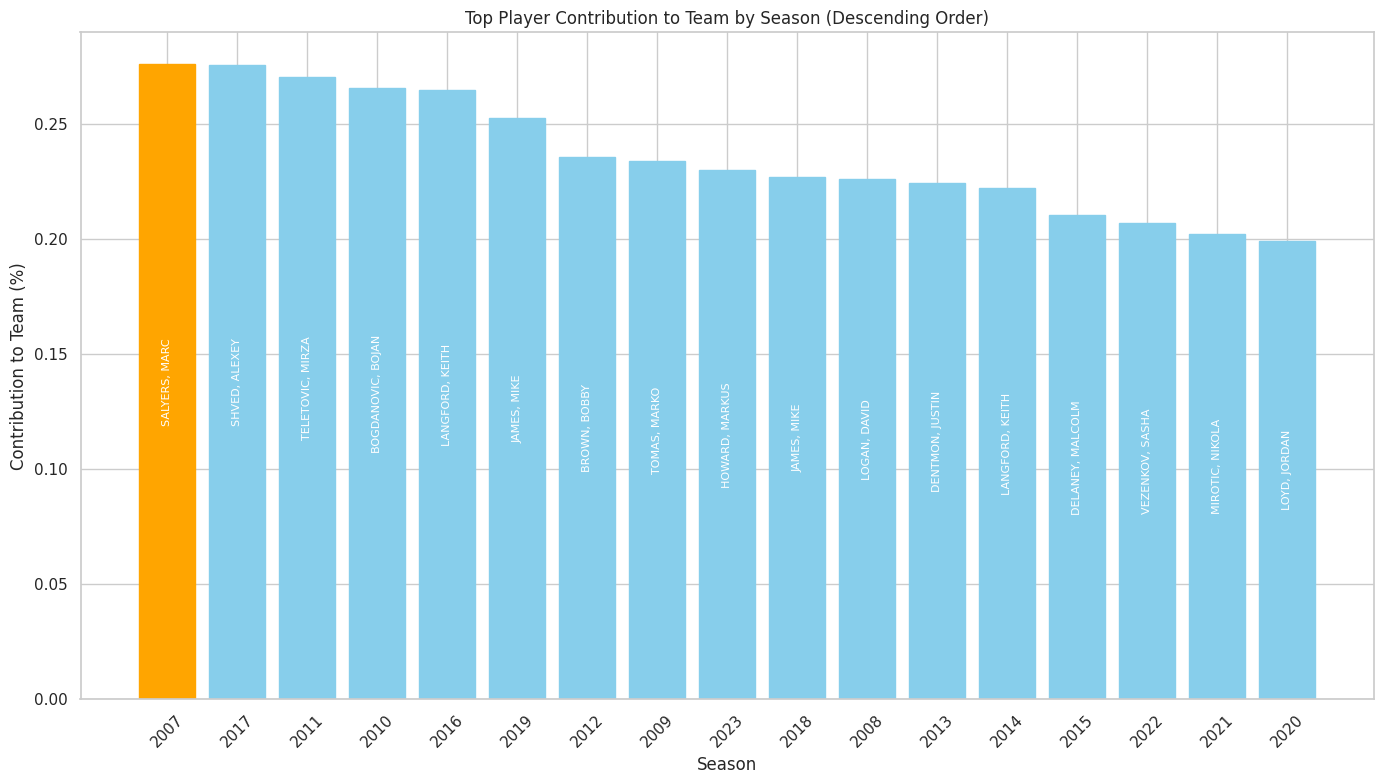

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# חישוב סך כל הנקודות לקבוצה בכל עונה
total_points_per_team_season = df2.groupby(['season_code', 'team_id'])['points'].sum().reset_index()

# חישוב סך כל הנקודות לשחקן בכל עונה
total_points_per_player_season = df2.groupby(['season_code', 'player', 'team_id'])['points'].sum().reset_index()

# איחוד הנתונים לשחקנים עם הנתונים של הקבוצות
merged_df = pd.merge(total_points_per_player_season, total_points_per_team_season, on=['season_code', 'team_id'], suffixes=('_player', '_team'))

# חישוב אחוז הנקודות של כל שחקן מסך הנקודות של הקבוצה
merged_df['contribution'] = merged_df['points_player'] / merged_df['points_team']

# הצגת השחקנים עם התרומה הגדולה ביותר לקבוצות שלהם בכל עונה
top_contributors_by_season = merged_df.sort_values(by=['season_code', 'contribution'], ascending=[True, False]).groupby('season_code').head(1)

# מיון התרומות בסדר יורד
top_contributors_sorted = top_contributors_by_season.sort_values(by='contribution', ascending=False)

# יצירת גרף עמודות
plt.figure(figsize=(14, 8))
bars = plt.bar(top_contributors_sorted['season_code'].astype(str), top_contributors_sorted['contribution'], color='skyblue')

# סימון העמודות המובילות בצבע שונה
colors = np.where(top_contributors_sorted['contribution'] == top_contributors_sorted['contribution'].max(), 'orange', 'skyblue')
for bar, color in zip(bars, colors):
    bar.set_color(color)

# הוספת כותרת ותגיות לצירים
plt.title('Top Player Contribution to Team by Season (Descending Order)')
plt.xlabel('Season')
plt.ylabel('Contribution to Team (%)')
plt.xticks(rotation=45)

# הוספת תוויות עם שמות השחקנים בתוך כל עמודה
for bar, label in zip(bars, top_contributors_sorted['player']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, label, ha='center', va='center', rotation=90, fontsize=8, color='white')

# הצגת הגרף
plt.tight_layout()
plt.show()

In [37]:
import pandas as pd

# הגדרת הנתיב לקובץ
data_path = "./datasets/euroleague/"

# טעינת קובץ ה-euroleague_players.csv
df_players = pd.read_csv(data_path + 'euroleague_players.csv', encoding='latin-1')

# הצגת 5 השורות הראשונות כדי לבדוק את הנתונים
print(df_players.head())

    season_player_id season_code player_id           player team_id  \
0  E2017_P003733_PAM       E2017   P003733  ABALDE, ALBERTO     PAM   
1  E2019_P003733_PAM       E2019   P003733  ABALDE, ALBERTO     PAM   
2  E2020_P003733_MAD       E2020   P003733  ABALDE, ALBERTO     MAD   
3  E2021_P003733_MAD       E2021   P003733  ABALDE, ALBERTO     MAD   
4  E2022_P003733_MAD       E2022   P003733  ABALDE, ALBERTO     MAD   

   games_played  games_started  minutes  points  two_points_made  ...  \
0          25.0            9.0    478.5     190               43  ...   
1          23.0            4.0    499.3     179               49  ...   
2          39.0           23.0    761.2     281               47  ...   
3          30.0           19.0    563.4     179               40  ...   
4          25.0           10.0    345.0      63               10  ...   

   total_rebounds_per_game  assists_per_game  steals_per_game  \
0                     2.08              1.68             0.32   
1   

In [38]:
# הצגת עמודות ה-DataFrame
print(df_players.columns)

# הצגת מידע כללי על ה-DataFrame
print(df_players.info())

# הצגת סטטיסטיקות תיאוריות של הנתונים המספריים
print(df_players.describe())

# הצגת מספר ערכים ייחודיים בכל עמודה
print(df_players.nunique())

Index(['season_player_id', 'season_code', 'player_id', 'player', 'team_id',
       'games_played', 'games_started', 'minutes', 'points', 'two_points_made',
       'two_points_attempted', 'three_points_made', 'three_points_attempted',
       'free_throws_made', 'free_throws_attempted', 'offensive_rebounds',
       'defensive_rebounds', 'total_rebounds', 'assists', 'steals',
       'turnovers', 'blocks_favour', 'blocks_against', 'fouls_committed',
       'fouls_received', 'valuation', 'plus_minus', 'minutes_per_game',
       'points_per_game', 'two_points_made_per_game',
       'two_points_attempted_per_game', 'two_points_percentage',
       'three_points_made_per_game', 'three_points_attempted_per_game',
       'three_points_percentage', 'free_throws_made_per_game',
       'free_throws_attempted_per_game', 'free_throws_percentage',
       'offensive_rebounds_per_game', 'defensive_rebounds_per_game',
       'total_rebounds_per_game', 'assists_per_game', 'steals_per_game',
       'turnove

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [39]:
import pandas as pd

# הגדרת הנתיב לקובץ
data_path = './datasets/euroleague/'

# טעינת הדאטה פריים
euroleague_players = pd.read_csv(data_path + 'euroleague_players.csv')

# בדיקה ראשונית של הדאטה פריים
print(euroleague_players.info())
print(euroleague_players.head())
print(euroleague_players.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5637 entries, 0 to 5636
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   season_player_id                 5637 non-null   object 
 1   season_code                      5637 non-null   object 
 2   player_id                        5637 non-null   object 
 3   player                           5637 non-null   object 
 4   team_id                          5637 non-null   object 
 5   games_played                     5637 non-null   float64
 6   games_started                    5637 non-null   float64
 7   minutes                          5637 non-null   float64
 8   points                           5637 non-null   int64  
 9   two_points_made                  5637 non-null   int64  
 10  two_points_attempted             5637 non-null   int64  
 11  three_points_made                5637 non-null   int64  
 12  three_points_attempt

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [40]:
# חישוב ממוצע הנקודות לכל שחקן בעונה
average_points_per_season = euroleague_players.groupby(['season_code', 'player'])['points'].mean().reset_index()
average_points_per_season.columns = ['season_code', 'player', 'avg_points_per_season']

# הצגת השחקנים המובילים בעונה מסוימת (לדוגמה עונת 2020)
top_players_2020 = average_points_per_season[average_points_per_season['season_code'] == 'E2020']
top_players_2020 = top_players_2020.sort_values(by='avg_points_per_season', ascending=False).head(10)

print(top_players_2020)

     season_code                 player  avg_points_per_season
4548       E2020        MICIC, VASILIJE                  668.0
4388       E2020       BALDWIN IV, WADE                  595.0
4599       E2020        REYNOLDS, JALEN                  531.0
4573       E2020          PANGOS, KEVIN                  528.0
4526       E2020          LARKIN, SHANE                  528.0
4493       E2020            JAMES, MIKE                  522.0
4590       E2020  PUNTER, KEVIN  XAVIER                  515.0
4553       E2020        MIROTIC, NIKOLA                  514.0
4485       E2020          HIGGINS, CORY                  512.0
4429       E2020         DE COLO, NANDO                  507.0


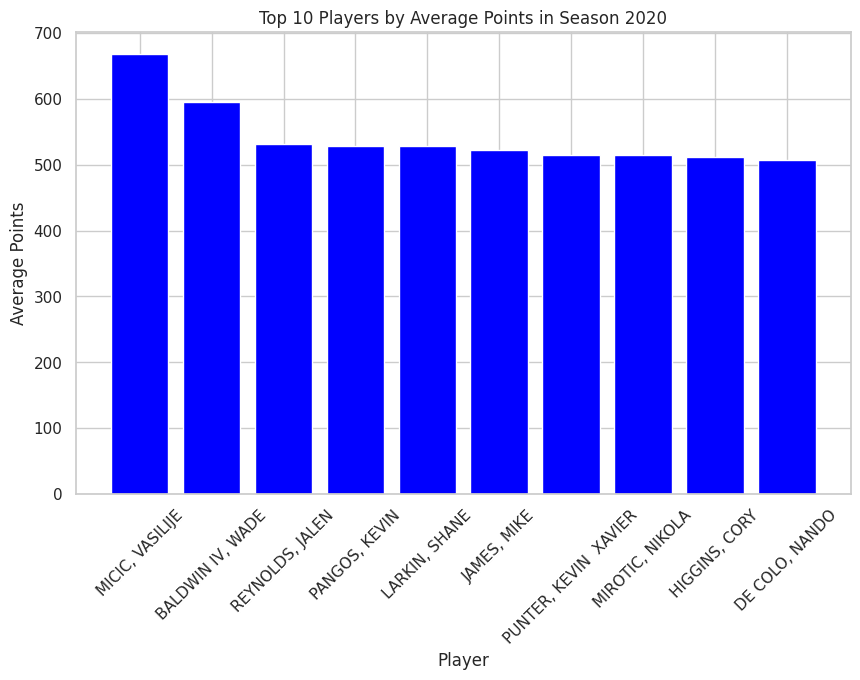

In [41]:
import matplotlib.pyplot as plt

# יצירת גרף עמודות להצגת השחקנים המובילים בעונת 2020 לפי ממוצע הנקודות
plt.figure(figsize=(10, 6))
plt.bar(top_players_2020['player'], top_players_2020['avg_points_per_season'], color='blue')
plt.title('Top 10 Players by Average Points in Season 2020')
plt.xlabel('Player')
plt.ylabel('Average Points')
plt.xticks(rotation=45)
plt.show()

In [42]:
# הצגת הערכים הייחודיים בעמודת 'round'
unique_rounds = df_box_score['round'].unique()
print(unique_rounds)

[17  5 24 15 11 18  3  2  9  4 20 13  1  7 16 12 10 14 23  8 25 19 21  6
 22 28 26 31 27 30 29 33 32 36 34 35 37 41 39 40 38 42 43]


In [43]:
import os

# הצגת הקבצים בתוך התיקייה 'datasets'
print(os.listdir('datasets'))

['euroleague']


In [44]:
import os

# הצגת הקבצים בתוך התיקייה 'datasets/euroleague'
print(os.listdir('datasets/euroleague'))

['euroleague_box_score.csv', 'euroleague_teams.csv', 'euroleague_play_by_play.csv', 'eurocup_teams.csv', 'euroleague_players.csv', 'eurocup_header.csv', 'euroleague_points.csv', 'eurocup_play_by_play.csv', 'eurocup_box_score.csv', 'eurocup_points.csv', 'eurocup_comparison.csv', 'eurocup_players.csv', 'euroleague_header.csv', 'euroleague-datasets.zip', 'euroleague_comparison.csv']


In [45]:
import pandas as pd

# טעינת הדאטה פריים
df_box_score = pd.read_csv('datasets/euroleague/euroleague_box_score.csv', encoding='latin-1')

# הצגת העמודות כדי לוודא שהדאטה פריים נטען כהלכה
print(df_box_score.columns)

Index(['game_player_id', 'game_id', 'game', 'round', 'phase', 'season_code',
       'player_id', 'is_starter', 'is_playing', 'team_id', 'dorsal', 'player',
       'minutes', 'points', 'two_points_made', 'two_points_attempted',
       'three_points_made', 'three_points_attempted', 'free_throws_made',
       'free_throws_attempted', 'offensive_rebounds', 'defensive_rebounds',
       'total_rebounds', 'assists', 'steals', 'turnovers', 'blocks_favour',
       'blocks_against', 'fouls_committed', 'fouls_received', 'valuation',
       'plus_minus'],
      dtype='object')


In [46]:
# סינון המשחקים שבהם הקבוצות הגיעו לגמר לפי ערך בעמודת 'round'
final_rounds = df_box_score[df_box_score['round'] == 42]

# ספירת מספר הפעמים שכל קבוצה הגיעה לגמר
final_appearances = final_rounds['team_id'].value_counts().reset_index()
final_appearances.columns = ['team_id', 'final_appearances']

# מיון הקבוצות לפי מספר ההופעות בגמר בסדר יורד
final_appearances_sorted = final_appearances.sort_values(by='final_appearances', ascending=False)

# הצגת התוצאה
print(final_appearances_sorted)

  team_id  final_appearances
0     MAD                 13
1     OLY                 13
2     PAN                 13
3     ULK                 13


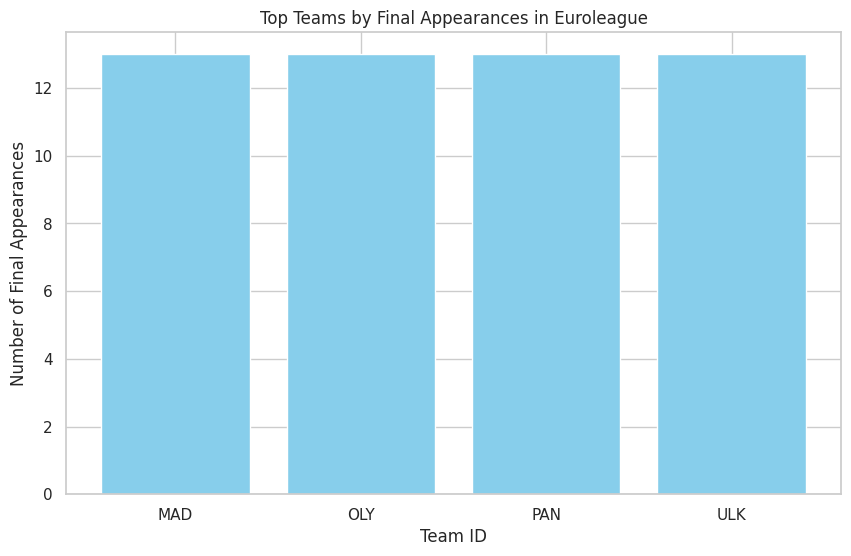

In [47]:
import matplotlib.pyplot as plt

# יצירת גרף עמודות להצגת מספר הפעמים שכל קבוצה הגיעה לגמר
plt.figure(figsize=(10, 6))
plt.bar(final_appearances_sorted['team_id'], final_appearances_sorted['final_appearances'], color='skyblue')

# הוספת כותרת ותוויות צירים
plt.title('Top Teams by Final Appearances in Euroleague')
plt.xlabel('Team ID')
plt.ylabel('Number of Final Appearances')

# הצגת הגרף
plt.show()

לפני הנתונים הקבוצות האלה הגיעו הכי הרבה פעמים בייחד לגמר


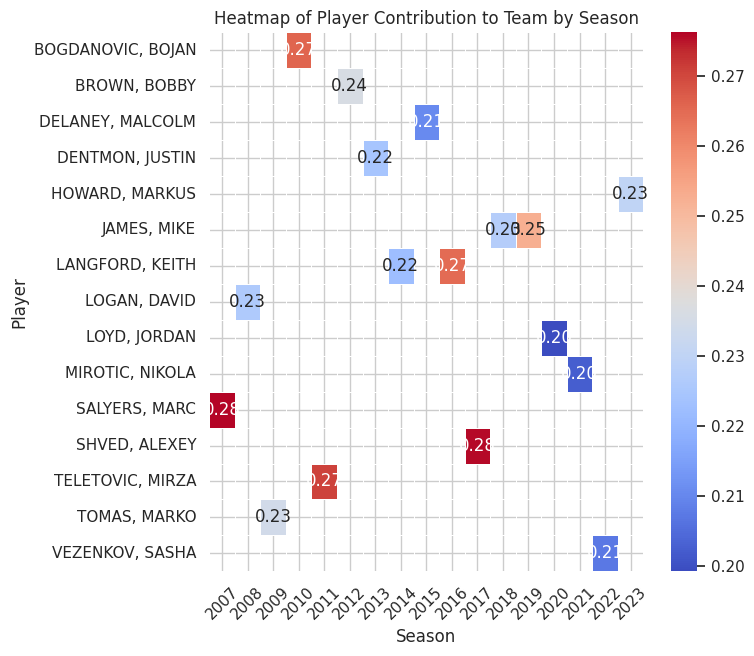

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# חישוב סך כל הנקודות לקבוצה בכל עונה
total_points_per_team_season = df2.groupby(['season_code', 'team_id'])['points'].sum().reset_index()

# חישוב סך כל הנקודות לשחקן בכל עונה
total_points_per_player_season = df2.groupby(['season_code', 'player', 'team_id'])['points'].sum().reset_index()

# איחוד הנתונים לשחקנים עם הנתונים של הקבוצות
merged_df = pd.merge(total_points_per_player_season, total_points_per_team_season, on=['season_code', 'team_id'], suffixes=('_player', '_team'))

# חישוב אחוז הנקודות של כל שחקן מסך הנקודות של הקבוצה
merged_df['contribution'] = merged_df['points_player'] / merged_df['points_team']

# הצגת השחקנים עם התרומה הגדולה ביותר לקבוצות שלהם בכל עונה
top_contributors_by_season = merged_df.sort_values(by=['season_code', 'contribution'], ascending=[True, False]).groupby('season_code').head(1)

# יצירת טבלת ציר (pivot table) להצגת התרומה של כל שחקן בעונה שלו
pivot_table = top_contributors_by_season.pivot(index='player', columns='season_code', values='contribution')

# יצירת מטריצת חום
plt.figure(figsize=(7, 7))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Player Contribution to Team by Season')
plt.xlabel('Season')
plt.ylabel('Player')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
